## Import Essential Libraries

In [143]:
import sys
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import collections
import hashlib
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import warnings
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import json

%matplotlib inline
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
time_to_date = lambda t: datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')

## Import Flows

In [144]:
## Trainning flow data for 20 iot devices 

filepath1 = 'flow_data/training/IoTAnalytics-TP-Link-Smart-plug_flows.csv'
switch_flows = pd.read_csv(filepath1, index_col=None, header=0, delimiter='\t')
switch_flows["label"] = 1
filepath2 = 'flow_data/training/MoniotrPublic_google_home_mini_flows.csv'
homemini_flows = pd.read_csv(filepath2, index_col=None, header=0, delimiter='\t')
homemini_flows["label"] = 2
filepath3 = 'flow_data/training/MoniotrPublic_cloudcam_flows.csv'
camera_flows = pd.read_csv(filepath3, index_col=None, header=0, delimiter='\t')
camera_flows["label"] = 3
filepath4 = 'flow_data/training/MoniotrPublic_washer_flows.csv'
washer_flows = pd.read_csv(filepath4, index_col=None, header=0, delimiter='\t')
washer_flows["label"] = 4
filepath5 = 'flow_data/training/MoniotrPublic_zmodo-doorbell_flows.csv'
doorbell_flows = pd.read_csv(filepath5, index_col=None, header=0, delimiter='\t')
doorbell_flows["label"] = 5
filepath6 = 'flow_data/training/MoniotrPublic_philips-bulb_flows.csv'
bulb_flows = pd.read_csv(filepath6, index_col=None, header=0, delimiter='\t')
bulb_flows["label"] = 6
filepath7 = 'flow_data/training/MoniotrPublic_microwave_flows.csv'
microwave_flows = pd.read_csv(filepath7, index_col=None, header=0, delimiter='\t')
microwave_flows["label"] = 7
filepath8 = 'flow_data/training/MoniotrPublic_smartthings-hub_flows.csv'
hub_flows = pd.read_csv(filepath8, index_col=None, header=0, delimiter='\t')
hub_flows["label"] = 8
filepath9 = 'flow_data/training/MoniotrPublic_microseven-camera_flows.csv'
microseven_camera_flows = pd.read_csv(filepath9, index_col=None, header=0, delimiter='\t')
microseven_camera_flows["label"] = 9
filepath10 = 'flow_data/training/MoniotrPublic_dryer_flows.csv'
dryer_flows = pd.read_csv(filepath10, index_col=None, header=0, delimiter='\t')
dryer_flows["label"] = 10
filepath11 = 'flow_data/training/MoniotrPublic_fridge_flows.csv'
fridge_flows = pd.read_csv(filepath11, index_col=None, header=0, delimiter='\t')
fridge_flows["label"] = 11
filepath12 = 'flow_data/training/MoniotrPublic_ikettle_flows.csv'
ikettle_flows = pd.read_csv(filepath12, index_col=None, header=0, delimiter='\t')
ikettle_flows["label"] = 12
filepath13 = 'flow_data/training/MoniotrPublic_xiaomi-ricecooker_flows.csv'
ricecooker_flows = pd.read_csv(filepath13, index_col=None, header=0, delimiter='\t')
ricecooker_flows["label"] = 13
filepath14 = 'flow_data/training/MoniotrPublic_echospot_flows.csv'
echospot_flows = pd.read_csv(filepath14, index_col=None, header=0, delimiter='\t')
echospot_flows["label"] = 14
filepath15 = 'flow_data/training/MoniotrPublic_magichome-strip_flows.csv'
strip_flows = pd.read_csv(filepath15, index_col=None, header=0, delimiter='\t')
strip_flows["label"] = 15
filepath16 = 'flow_data/training/IoTAnalytics_Withings-Smart-Baby-Monitor_flows.csv'
Baby_Monitor_flows = pd.read_csv(filepath16, index_col=None, header=0, delimiter='\t')
Baby_Monitor_flows["label"] = 16
filepath17 = 'flow_data/training/IoTAnalytics_HP-Printer_flows.csv'
Printer_flows = pd.read_csv(filepath17, index_col=None, header=0, delimiter='\t')
Printer_flows["label"] = 17
filepath18 = 'flow_data/training/IoTAnalytics_Triby-Speaker_flows.csv'
Speaker_flows = pd.read_csv(filepath18, index_col=None, header=0, delimiter='\t')
Speaker_flows["label"] = 18
filepath19 = 'flow_data/training/IoTAnalytics_iHome_flows.csv'
iHome_flows = pd.read_csv(filepath19, index_col=None, header=0, delimiter='\t')
iHome_flows["label"] = 19
filepath20 = 'flow_data/training/IoTAnalytics_Amazon-Echo_flows.csv'
Echo_flows = pd.read_csv(filepath20, index_col=None, header=0, delimiter='\t')
Echo_flows["label"] = 20


In [145]:
### Testing flow data for 15 iot devices 

filepath21 = 'flow_data/testing/google-home-mini_flows.csv'
t_homemini_flows = pd.read_csv(filepath21, index_col=None, header=0, delimiter='\t')
t_homemini_flows["label"] = 2
filepath22 = 'flow_data/testing/smartthings-hub_flows.csv'
t_hub_flows = pd.read_csv(filepath22, index_col=None, header=0, delimiter='\t')
t_hub_flows["label"] = 8
filepath23 = 'flow_data/testing/tplink-plug_flows.csv'
t_plug_flows = pd.read_csv(filepath23, index_col=None, header=0, delimiter='\t')
t_plug_flows["label"] = 1
filepath24 = 'flow_data/testing/echospot_flows.csv'
t_echospot_flows = pd.read_csv(filepath24, index_col=None, header=0, delimiter='\t')
t_echospot_flows["label"] = 14
filepath25 = 'flow_data/testing/cloudcam_flows.csv'
t_cloudcam_flows = pd.read_csv(filepath25, index_col=None, header=0, delimiter='\t')
t_cloudcam_flows["label"] = 3
filepath26 = 'flow_data/testing/fridge_flows.csv'
t_fridge_flows = pd.read_csv(filepath26, index_col=None, header=0, delimiter='\t')
t_fridge_flows["label"] = 11
filepath27 = 'flow_data/testing/magichome-strip_flows.csv'
t_magichome_flows = pd.read_csv(filepath27, index_col=None, header=0, delimiter='\t')
t_magichome_flows["label"] = 15
filepath28 = 'flow_data/testing/philips-bulb_flows.csv'
t_blub_flows = pd.read_csv(filepath28, index_col=None, header=0, delimiter='\t')
t_blub_flows["label"] = 6
filepath29 = 'flow_data/testing/washer_flows.csv'
t_washed_flows = pd.read_csv(filepath29, index_col=None, header=0, delimiter='\t')
t_washed_flows["label"] = 4
filepath30 = 'flow_data/testing/xiaomi-ricecooker_flows.csv'
t_ricecooker_flows = pd.read_csv(filepath30, index_col=None, header=0, delimiter='\t')
t_ricecooker_flows["label"] = 13
filepath31 = 'flow_data/testing/ikettle_flows.csv'
t_ikettle_flows = pd.read_csv(filepath31, index_col=None, header=0, delimiter='\t')
t_ikettle_flows["label"] = 12
filepath32 = 'flow_data/testing/zmodo-doorbell_flows.csv'
t_doorbell_flows = pd.read_csv(filepath32, index_col=None, header=0, delimiter='\t')
t_doorbell_flows["label"] = 5
filepath33 = 'flow_data/testing/dryer_flows.csv'
t_dryer_flows = pd.read_csv(filepath33, index_col=None, header=0, delimiter='\t')
t_dryer_flows["label"] = 10
filepath34 = 'flow_data/testing/microseven-camera_flows.csv'
t_microseven_flows = pd.read_csv(filepath34, index_col=None, header=0, delimiter='\t')
t_microseven_flows["label"] = 9
filepath35 = 'flow_data/testing/microwave_flows.csv'
t_microwave_flows = pd.read_csv(filepath35, index_col=None, header=0, delimiter='\t')
t_microwave_flows["label"] = 7


## Data Pre-processing : Data Cleaning and Oversampling 

In [146]:
not_used_features = ['timeFirst', 'timeLast','dstPort', 'srcPort', 'dstIP', 
                      'dstMac', 'srcIP', 'srcMac', 'srcMac_dstMac_numP','ethVlanID','ipOptCpCl_Num',
                     'icmpBFTypH_TypL_Code', 'ip6OptHH_D', 'ip6OptCntHH_D']

hex_features = ['flowStat', 'tcpFStat', 'ipTOS', 'ipFlags', 'ethType',
                 'tcpStates', 'icmpStat', 'icmpTmGtw', 'macStat','tcpAnomaly', 
                'tcpFlags',  'tcpMPF', 'tcpMPTBF', 'tcpMPdssF', 'tcpOptions']


string_features = ['%dir', 'hdrDesc', 'srcManuf_dstManuf', 'dstPortClass', 
                   'srcIPCC', 'dstIPCC', 'dstIPOrg', 'srcIPOrg']

features = ['duration', 'numHdrDesc', 'numHdrs',
             'l4Proto', 'macPairs', 'dstPortClassN', 'numPktsSnt', 'numPktsRcvd',
            'numBytesSnt', 'numBytesRcvd', 'minPktSz', 'maxPktSz', 'avePktSize', 'stdPktSize', 'pktps', 'bytps',
            'pktAsm', 'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipOptCnt',
            'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt', 'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt',
            'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz', 'tcpWinSzDwnCnt', 'tcpWinSzUpCnt',
            'tcpWinSzChgDirCnt', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpMSS', 'tcpWS', 'tcpTmS', 'tcpTmER', 'tcpEcI',
            'tcpBtm', 'tcpSSASAATrip', 'tcpRTTAckTripMin', 'tcpRTTAckTripMax', 'tcpRTTAckTripAve',
            'tcpRTTAckTripJitAve', 'tcpRTTSseqAA', 'tcpRTTAckJitAve', 'icmpTCcnt', 'icmpEchoSuccRatio', 'icmpPFindex',
            'connSip', 'connDip', 'connSipDip', 'connSipDprt', 'connF',  'aveIAT', 'maxIAT', 
                'minIAT', 'stdIAT', 'tcpISeqN', 'tcpMPAID', 'tcpUtm', 'tcpWinSzThRt','label']

In [148]:
flows = pd.concat([ switch_flows[features], homemini_flows[features],camera_flows[features],
                   washer_flows[features],doorbell_flows[features],hub_flows[features],
                   microseven_camera_flows[features],bulb_flows[features],microwave_flows[features],
                   dryer_flows[features],fridge_flows[features],ikettle_flows[features],
                   ricecooker_flows[features],echospot_flows[features],strip_flows[features],
                   Baby_Monitor_flows[features],
                   Speaker_flows[features],iHome_flows[features],Echo_flows[features],Printer_flows[features]
                    ], axis=0, ignore_index=True)

In [149]:
testing_flows = pd.concat([t_homemini_flows[features], t_hub_flows[features],t_plug_flows[features],
                           t_echospot_flows[features],t_cloudcam_flows[features],t_fridge_flows[features],
                           t_magichome_flows[features],t_blub_flows[features],t_washed_flows[features],
                           t_ricecooker_flows[features],t_ikettle_flows[features],t_doorbell_flows[features],
                           t_dryer_flows[features],t_microseven_flows[features],t_microwave_flows[features]  
                           ], axis=0, ignore_index=True)

In [150]:
# check missing values 
print((flows.isnull().sum()/len(testing_flows)*100).nlargest())

duration      0.0
numHdrDesc    0.0
numHdrs       0.0
l4Proto       0.0
macPairs      0.0
dtype: float64


In [151]:
## Check the number of flows in each IoT device 
flows['label'].value_counts()

10    21081
5     16343
4     15581
20     8182
8      6013
11     4171
2      4076
14     3034
16     1596
1      1024
3       923
18      563
17      539
9       372
7       298
13      276
6       276
15      250
12      244
19      188
Name: label, dtype: int64

In [152]:
## since data is not balanced we use SMOTE to prevent bias in classification 

x = flows.iloc[:, flows.columns != 'label']
y = flows.iloc[:, flows.columns == 'label']

smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)


In [153]:
x_smote['label'] = y_smote['label']
flows = x_smote

In [154]:
flows.head()

,duration,numHdrDesc,numHdrs,l4Proto,macPairs,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,...,connF,aveIAT,maxIAT,minIAT,stdIAT,tcpISeqN,tcpMPAID,tcpUtm,tcpWinSzThRt,label
0,0.0,1,2,0,1,0,1,1,28,28,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0,1
1,0.0,1,2,0,1,0,1,1,28,28,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0,1
2,0.0,1,2,0,1,0,1,1,28,28,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0,1
3,0.0,1,2,0,1,0,1,1,28,28,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0,1
4,0.0,1,2,0,1,0,1,0,99,0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0,1


In [155]:
y_smote['label'].value_counts()

1     21081
2     21081
20    21081
19    21081
18    21081
16    21081
15    21081
14    21081
13    21081
12    21081
11    21081
10    21081
7     21081
6     21081
9     21081
8     21081
5     21081
4     21081
3     21081
17    21081
Name: label, dtype: int64

## Feature selection 

## 1- Filter method

### 1.1 Identify input features having high correlation with target variable

In [156]:
importances = flows.drop("label", axis=1).apply(lambda x : x.corr(flows.label))
indices = np.argsort(importances)
print(importances[indices])

numBytesRcvd      -0.014379
tcpWinSzThRt            NaN
maxPktSz          -0.234712
connSip           -0.031628
tcpWinSzThRt            NaN
                     ...   
tcpRTTAckJitAve    0.006212
bytps             -0.045361
tcpWinSzThRt            NaN
pktps             -0.039239
tcpWinSzThRt            NaN
Length: 68, dtype: float64


In [157]:
importan_features = []
for i in range(0, len(indices)):
    if np.abs(importances[i]>0):
        importan_features.append(features[i])
        print(features[i],importances[i])


duration 0.060526200932468216
l4Proto 0.07096676631245462
minPktSz 0.028881574969240004
pktAsm 0.22510554038996922
bytAsm 0.15293856395989372
ipMindIPID 0.10073481220086763
ipTTLChg 0.009611641546215504
ipOptCnt 0.015072637409217448
tcpPSeqCnt 0.00832770804195313
tcpPAckCnt 0.010937525494920834
tcpAckFaultCnt 0.012244695164767824
tcpWinSzDwnCnt 0.02144443039878467
tcpWinSzChgDirCnt 0.017085453055315572
tcpOptPktCnt 0.011682994959621575
tcpOptCnt 0.011293001675481414
tcpWS 0.01093536044043062
tcpSSASAATrip 0.0069115092403324785
tcpRTTAckTripMin 0.0874981444035943
tcpRTTAckTripMax 0.005761268964017593
tcpRTTAckTripAve 0.0072506853967699795
tcpRTTAckTripJitAve 0.005814479799546965
tcpRTTSseqAA 0.008763072843229988
tcpRTTAckJitAve 0.006212140580789214
icmpTCcnt 0.03383955572763087
icmpEchoSuccRatio 0.11920319740165745
aveIAT 0.0255366792157835
maxIAT 0.01913676060758695
stdIAT 0.016382192046955353
tcpUtm 0.05096894387753679


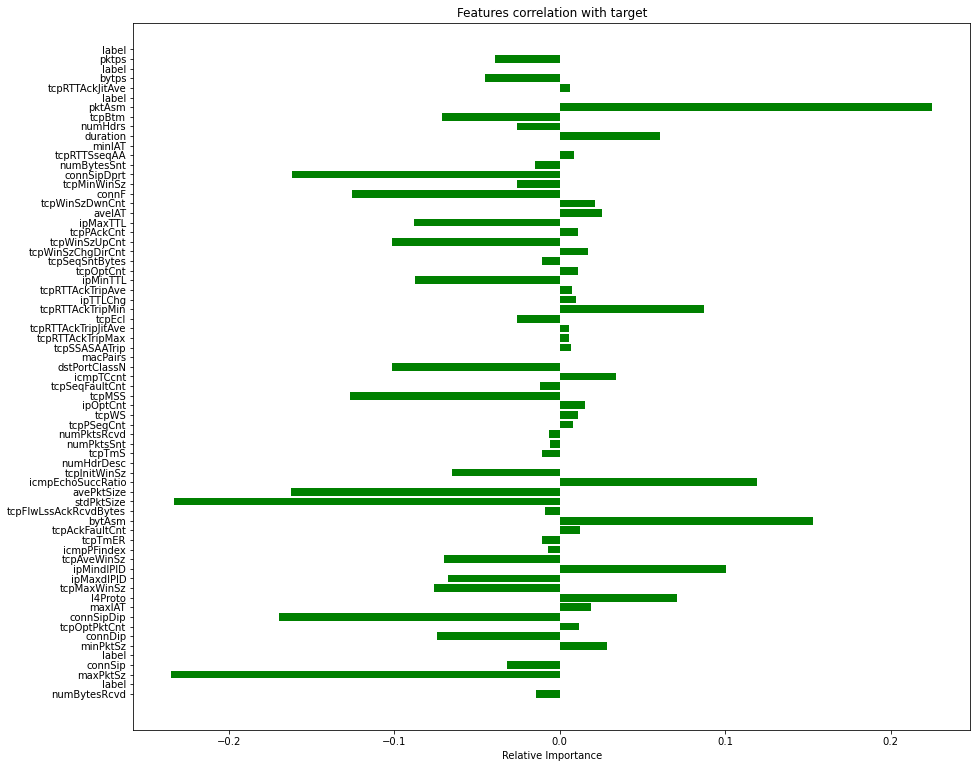

In [158]:
plt.figure(figsize=(15,13))
plt.title('Features correlation with target')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### 1.2 Identify features having high correlation with other features

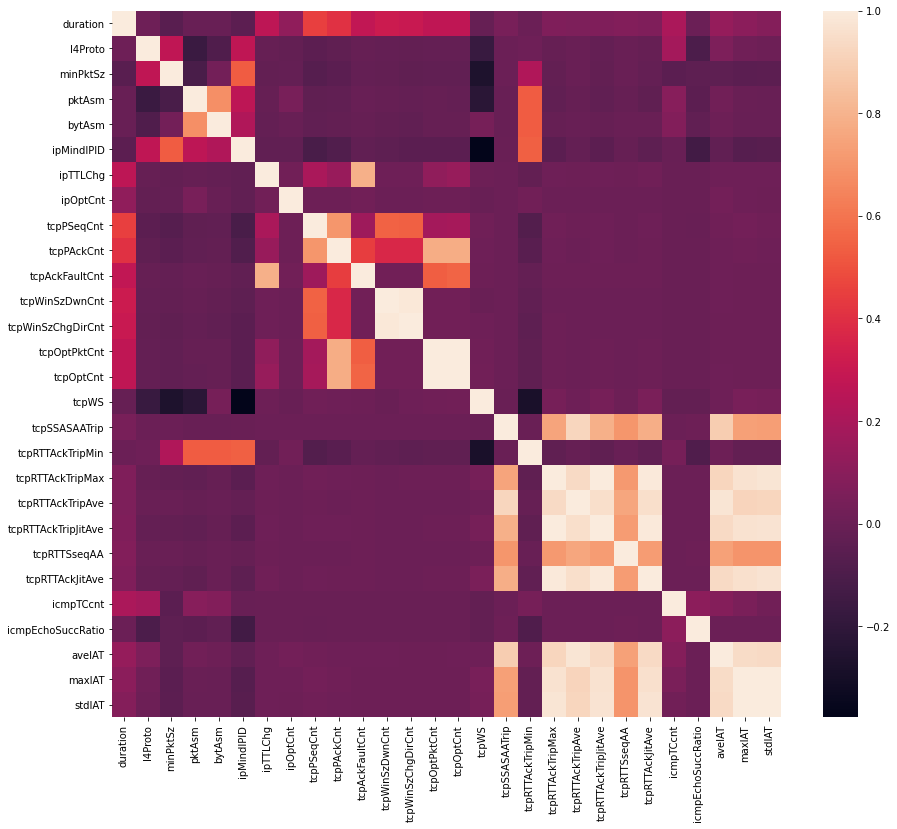

In [159]:
data_1 = flows[importan_features]
corr = data_1.iloc[:, :-1].corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

In [160]:
highly_corr = []
m = 0
for i in range(0,len(data_1.columns)):
    for j in  range(0,len(data_1.columns)):
        if i!=j:
            corr_1=np.abs(data_1[data_1.columns[i]].corr(data_1[data_1.columns[j]]))
            if corr_1>0.75:
                highly_corr.append(data_1.columns[i])
                print( data_1.columns[i] , " is highly  correlated  with ", data_1.columns[j])

ipTTLChg  is highly  correlated  with  tcpAckFaultCnt
tcpPAckCnt  is highly  correlated  with  tcpOptPktCnt
tcpPAckCnt  is highly  correlated  with  tcpOptCnt
tcpAckFaultCnt  is highly  correlated  with  ipTTLChg
tcpWinSzDwnCnt  is highly  correlated  with  tcpWinSzChgDirCnt
tcpWinSzChgDirCnt  is highly  correlated  with  tcpWinSzDwnCnt
tcpOptPktCnt  is highly  correlated  with  tcpPAckCnt
tcpOptPktCnt  is highly  correlated  with  tcpOptCnt
tcpOptCnt  is highly  correlated  with  tcpPAckCnt
tcpOptCnt  is highly  correlated  with  tcpOptPktCnt
tcpSSASAATrip  is highly  correlated  with  tcpRTTAckTripMax
tcpSSASAATrip  is highly  correlated  with  tcpRTTAckTripAve
tcpSSASAATrip  is highly  correlated  with  tcpRTTAckTripJitAve
tcpSSASAATrip  is highly  correlated  with  tcpRTTAckJitAve
tcpSSASAATrip  is highly  correlated  with  aveIAT
tcpRTTAckTripMax  is highly  correlated  with  tcpSSASAATrip
tcpRTTAckTripMax  is highly  correlated  with  tcpRTTAckTripAve
tcpRTTAckTripMax  is highly 

In [161]:
importan_features.remove("tcpOptCnt")
importan_features.remove("tcpSSASAATrip")
importan_features.remove("tcpRTTAckTripAve")
importan_features.remove("tcpRTTAckJitAve")
importan_features.remove("tcpRTTAckTripMax")
importan_features.remove("tcpRTTAckTripJitAve")
importan_features.remove("maxIAT")
importan_features.remove("stdIAT")
importan_features.remove("tcpAckFaultCnt")
importan_features.remove("tcpWinSzDwnCnt")
importan_features.remove("tcpOptPktCnt")


In [162]:
### make sure there is no high corrleation left 
data_1 = flows[importan_features]
highly_corr = []
m = 0
for i in range(0,len(data_1.columns)):
    for j in  range(0,len(data_1.columns)):
        if i!=j:
            corr_1=np.abs(data_1[data_1.columns[i]].corr(data_1[data_1.columns[j]]))
            if corr_1>0.75:
                highly_corr.append(data_1.columns[i])
                print( data_1.columns[i] , " is highly  correlated  with ", data_1.columns[j])

In [163]:
len(importan_features)

18

### 1.3 Identify features that have high information gain with respect to the target variable

<AxesSubplot:>

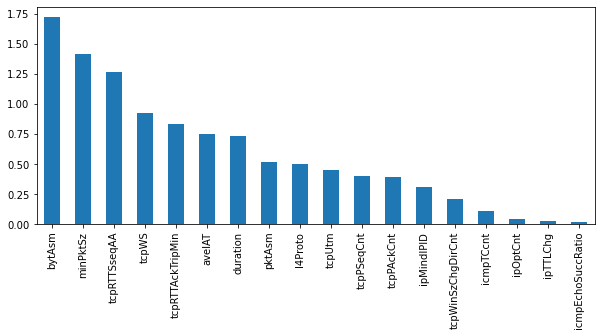

In [164]:
data_3 = flows[importan_features]
labels = flows['label']
mi = mutual_info_regression(data_3, labels)
mi = pd.Series(mi)
mi.index = data_3.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [165]:
importan_features.remove("icmpEchoSuccRatio")
importan_features.remove("ipTTLChg")
importan_features.remove("ipOptCnt")

In [166]:
len(importan_features)

15

## 2 - Lasso

In [145]:
pipeline = Pipeline([
                     ('model',Lasso())
])

In [147]:
# Used for splitting and normalizing dataset.
#def test_scale()
X2_train = flows.iloc[:, flows.columns != 'label']
y2_train = flows.iloc[:, flows.columns == 'label']

X2_test = testing_flows.iloc[:, testing_flows.columns != 'label']
y2_test = testing_flows.iloc[:, testing_flows.columns == 'label']

#Normalizing
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X2_train)
X2_test = sc_X.transform(X2_test)

In [148]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso= Lasso()
parameters = {'model__alpha':np.arange(0,10,0.1)}
lasso_model = GridSearchCV(pipeline, parameters, cv = 5, scoring="r2",verbose=3) 
lasso_model.fit(X_train,y_train)  
pred = lasso_model.predict(X_test)
print('lasso_model.best_params_：',lasso_model.best_params_)   
print('lasso_model.best_score_：',lasso_model.best_score_)   
print('Training set R^2：',lasso_model.score(X_train,y_train))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..................model__alpha=0.0;, score=0.113 total time=   3.6s
[CV 2/5] END ..................model__alpha=0.0;, score=0.107 total time=   3.5s
[CV 3/5] END ..................model__alpha=0.0;, score=0.113 total time=   3.7s
[CV 4/5] END ..................model__alpha=0.0;, score=0.107 total time=   3.5s
[CV 5/5] END ..................model__alpha=0.0;, score=0.111 total time=   3.4s
[CV 1/5] END ..................model__alpha=0.1;, score=0.105 total time=   0.1s
[CV 2/5] END ..................model__alpha=0.1;, score=0.100 total time=   0.1s
[CV 3/5] END ..................model__alpha=0.1;, score=0.105 total time=   0.1s
[CV 4/5] END ..................model__alpha=0.1;, score=0.101 total time=   0.1s
[CV 5/5] END ..................model__alpha=0.1;, score=0.103 total time=   0.1s
[CV 1/5] END ..................model__alpha=0.2;, score=0.092 total time=   0.1s
[CV 2/5] END ..................model__alpha=0.

[CV 4/5] END .................model__alpha=2.0;, score=-0.000 total time=   0.1s
[CV 5/5] END .................model__alpha=2.0;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=2.1;, score=-0.000 total time=   0.1s
[CV 2/5] END .................model__alpha=2.1;, score=-0.000 total time=   0.1s
[CV 3/5] END .................model__alpha=2.1;, score=-0.000 total time=   0.1s
[CV 4/5] END .................model__alpha=2.1;, score=-0.000 total time=   0.1s
[CV 5/5] END .................model__alpha=2.1;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=2.2;, score=-0.000 total time=   0.1s
[CV 2/5] END .................model__alpha=2.2;, score=-0.000 total time=   0.1s
[CV 3/5] END .................model__alpha=2.2;, score=-0.000 total time=   0.1s
[CV 4/5] END .................model__alpha=2.2;, score=-0.000 total time=   0.1s
[CV 5/5] END .................model__alpha=2.2;, score=-0.000 total time=   0.1s
[CV 1/5] END ..model__alpha=

[CV 2/5] END ..model__alpha=4.1000000000000005;, score=-0.000 total time=   0.1s
[CV 3/5] END ..model__alpha=4.1000000000000005;, score=-0.000 total time=   0.1s
[CV 4/5] END ..model__alpha=4.1000000000000005;, score=-0.000 total time=   0.1s
[CV 5/5] END ..model__alpha=4.1000000000000005;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=4.2;, score=-0.000 total time=   0.1s
[CV 2/5] END .................model__alpha=4.2;, score=-0.000 total time=   0.1s
[CV 3/5] END .................model__alpha=4.2;, score=-0.000 total time=   0.1s
[CV 4/5] END .................model__alpha=4.2;, score=-0.000 total time=   0.1s
[CV 5/5] END .................model__alpha=4.2;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=4.3;, score=-0.000 total time=   0.1s
[CV 2/5] END .................model__alpha=4.3;, score=-0.000 total time=   0.1s
[CV 3/5] END .................model__alpha=4.3;, score=-0.000 total time=   0.1s
[CV 4/5] END ...............

[CV 5/5] END ..model__alpha=6.1000000000000005;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=6.2;, score=-0.000 total time=   0.1s
[CV 2/5] END .................model__alpha=6.2;, score=-0.000 total time=   0.1s
[CV 3/5] END .................model__alpha=6.2;, score=-0.000 total time=   0.1s
[CV 4/5] END .................model__alpha=6.2;, score=-0.000 total time=   0.1s
[CV 5/5] END .................model__alpha=6.2;, score=-0.000 total time=   0.1s
[CV 1/5] END ...model__alpha=6.300000000000001;, score=-0.000 total time=   0.1s
[CV 2/5] END ...model__alpha=6.300000000000001;, score=-0.000 total time=   0.1s
[CV 3/5] END ...model__alpha=6.300000000000001;, score=-0.000 total time=   0.1s
[CV 4/5] END ...model__alpha=6.300000000000001;, score=-0.000 total time=   0.1s
[CV 5/5] END ...model__alpha=6.300000000000001;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=6.4;, score=-0.000 total time=   0.1s
[CV 2/5] END ...............

[CV 2/5] END ...model__alpha=8.200000000000001;, score=-0.000 total time=   0.1s
[CV 3/5] END ...model__alpha=8.200000000000001;, score=-0.000 total time=   0.1s
[CV 4/5] END ...model__alpha=8.200000000000001;, score=-0.000 total time=   0.1s
[CV 5/5] END ...model__alpha=8.200000000000001;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=8.3;, score=-0.000 total time=   0.1s
[CV 2/5] END .................model__alpha=8.3;, score=-0.000 total time=   0.1s
[CV 3/5] END .................model__alpha=8.3;, score=-0.000 total time=   0.1s
[CV 4/5] END .................model__alpha=8.3;, score=-0.000 total time=   0.1s
[CV 5/5] END .................model__alpha=8.3;, score=-0.000 total time=   0.1s
[CV 1/5] END .................model__alpha=8.4;, score=-0.000 total time=   0.1s
[CV 2/5] END .................model__alpha=8.4;, score=-0.000 total time=   0.1s
[CV 3/5] END .................model__alpha=8.4;, score=-0.000 total time=   0.1s
[CV 4/5] END ...............

In [149]:
coefficients = lasso_model.best_estimator_.named_steps['model'].coef_

In [150]:
importance = np.abs(coefficients)
importance

array([0.43947062, 0.80566488, 0.35548984, 2.02079363, 0.29367183,
       0.36709654, 0.00892054, 0.02806599, 0.06503694, 0.00614727,
       0.01287999, 0.49329694, 0.43769952, 0.62917001, 0.3683409 ,
       0.02898034, 0.26620916, 0.90129849, 0.0733916 , 0.35433692])

In [153]:
features = ['flowInd', 'duration', 'numHdrDesc', 'numHdrs',
             'l4Proto', 'macPairs', 'dstPortClassN', 'numPktsSnt', 'numPktsRcvd',
            'numBytesSnt', 'numBytesRcvd', 'minPktSz', 'maxPktSz', 'avePktSize', 'stdPktSize', 'pktps', 'bytps',
            'pktAsm', 'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipOptCnt',
            'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt', 'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt',
            'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz', 'tcpWinSzDwnCnt', 'tcpWinSzUpCnt',
            'tcpWinSzChgDirCnt', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpMSS', 'tcpWS', 'tcpTmS', 'tcpTmER', 'tcpEcI',
            'tcpBtm', 'tcpSSASAATrip', 'tcpRTTAckTripMin', 'tcpRTTAckTripMax', 'tcpRTTAckTripAve',
            'tcpRTTAckTripJitAve', 'tcpRTTSseqAA', 'tcpRTTAckJitAve', 'icmpTCcnt', 'icmpEchoSuccRatio', 'icmpPFindex',
            'connSip', 'connDip', 'connSipDip', 'connSipDprt', 'connF',  'aveIAT', 'maxIAT',
                'minIAT', 'stdIAT', 'tcpISeqN', 'tcpMPAID', 'tcpUtm', 'tcpWinSzThRt','label']

## ML Classifcation 

In [167]:
## Final feature vecotr 
features_vetor = ["connDip","connSip","minPktSz","duration","pktAsm","tcpRTTAckTripMax","label"]

In [176]:
X = flows[features_vetor]
Y = testing_flows[features_vetor]

In [177]:
X_1 = X.iloc[:, X.columns != 'label']
y = X.iloc[:, X.columns == 'label']

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.50, random_state=1)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [178]:
# # # # splitting and normalizing dataset.

# X_train = X.iloc[:, X.columns != 'label']
# y_train = X.iloc[:, X.columns == 'label']

# X_test = Y.iloc[:, Y.columns != 'label']
# y_test = Y.iloc[:, Y.columns == 'label']



# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

## Save StandardScaler
# joblib.dump(sc_X, 'std_scaler.bin', compress=True)

In [179]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (210810, 68)
Training Labels Shape: (210810, 68)
Testing Features Shape: (210810, 1)
Testing Labels Shape: (210810, 1)


#### Random Forest Classifier

In [180]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [181]:
print("Accuracy", round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy 0.81


In [431]:
## save RandomForestClassifier model
joblib.dump(classifier, "./random_forest.joblib")

['./random_forest.joblib']

#### K-Neighbors Classifier

In [182]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

In [183]:
print("Accuracy", round(metrics.accuracy_score(y_test, y_pred2),2))

Accuracy 0.81


In [433]:
joblib.dump(knn, "./KNeighborsClassifier.joblib")

['./KNeighborsClassifier.joblib']

## Prediction / Verification

In [187]:
features.remove("label")

In [188]:
y_pred = knn.predict(t_cloudcam_flows[features])

In [193]:
result = Counter(y_pred).most_common()
res = [list(ele) for ele in result]
f = open('device_label.json')
data = json.load(f)
dataList =  data['lables']
for i in res:
    for index in range(len(data['lables'])):
        if (i[0] == index):
            for key in dataList[index]:
                i[0]= dataList[index][key]
    if (i[0] == 20):
        i[0]= "amazon Echo"
print("***** Device Classification : ",res,"*****")

***** Device Classification :  [['microseven camera', 676], ['fridge', 253], ['bulb', 166], ['homemini', 66], ['washer', 15], ['amazon Echo', 3], ['camera', 1], ['doorbell', 1]] *****
